<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Visualizaciones de prueba de cambios hormonales</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p> 
  </div>
</div>

Se analiza como afecta el nivel de estrés y ansiedad a la calidad del sueño de los usuarios.

# 0. Librerías

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

In [22]:
def pretty_user_text(user):
    """
    Esta función formatea el texto del identificador de un usuario para que sea más legible.
    
    Args:
    user: Identificador del usuario.
    
    Returns:
    Identificador del usuario formateado.
    """
    user = user.replace('user_', 'Usuario ')
    return user

# 1. Carga de datos

In [23]:
saliva_path = os.path.join('..', '0_data', 'clean_MMASH', 'saliva_clean.pkl')
df_saliva = pd.read_pickle(saliva_path)

Se visualiza el conjunto de datos de saliva para tener una idea de cómo es su estructura.

In [24]:
df_saliva

,User,Cortisol_before_sleep,Cortisol_wake_up,Cortisol_diff,Melatonin_before_sleep,Melatonin_wake_up,Melatonin_diff
0,user_1,0.034137,0.077939,0.043802,1.738385e-08,6.747893e-09,-1.063595e-08
1,user_2,0.021186,0.261252,0.240065,1.676342e-08,2.853905e-08,1.177563e-08
2,user_3,0.012142,0.043799,0.031657,5.714439e-09,3.603324e-09,-2.111115e-09
3,user_4,0.023772,0.041724,0.017952,2.149747e-08,8.055610e-09,-1.344186e-08
4,user_5,0.022310,0.089516,0.067206,2.396239e-08,1.096777e-08,-1.299462e-08
5,user_6,0.015039,0.081888,0.066849,1.126009e-08,8.363179e-09,-2.896914e-09
6,user_7,0.020206,0.057075,0.036868,1.016154e-08,1.217397e-08,2.012434e-09
7,user_8,0.035106,0.086437,0.051331,3.334482e-09,3.820310e-09,4.858282e-10
8,user_9,0.025968,0.080560,0.054592,5.593342e-09,7.385992e-09,1.792650e-09
9,user_10,0.037046,0.019659,-0.017387,8.669611e-09,2.573795e-09,-6.095816e-09


# 2. Exploración de las visualizaciones

**Distribución de cortisol y melatonina en saliva**

In [25]:
# Se crea un df tipo long para cortisol y melatonina
df_cortisol = df_saliva[['Cortisol_before_sleep', 'Cortisol_wake_up']]
df_cortisol = df_cortisol.melt(var_name='Instant', value_name='Cortisol')
display(df_cortisol.head())

df_melatonina = df_saliva[['Melatonin_before_sleep', 'Melatonin_wake_up']]
df_melatonina = df_melatonina.melt(var_name='Instant', value_name='Melatonin')
display(df_melatonina.head())

,Instant,Cortisol
0,Cortisol_before_sleep,0.034137
1,Cortisol_before_sleep,0.021186
2,Cortisol_before_sleep,0.012142
3,Cortisol_before_sleep,0.023772
4,Cortisol_before_sleep,0.022310


,Instant,Melatonin
0,Melatonin_before_sleep,1.738385e-08
1,Melatonin_before_sleep,1.676342e-08
2,Melatonin_before_sleep,5.714439e-09
3,Melatonin_before_sleep,2.149747e-08
4,Melatonin_before_sleep,2.396239e-08


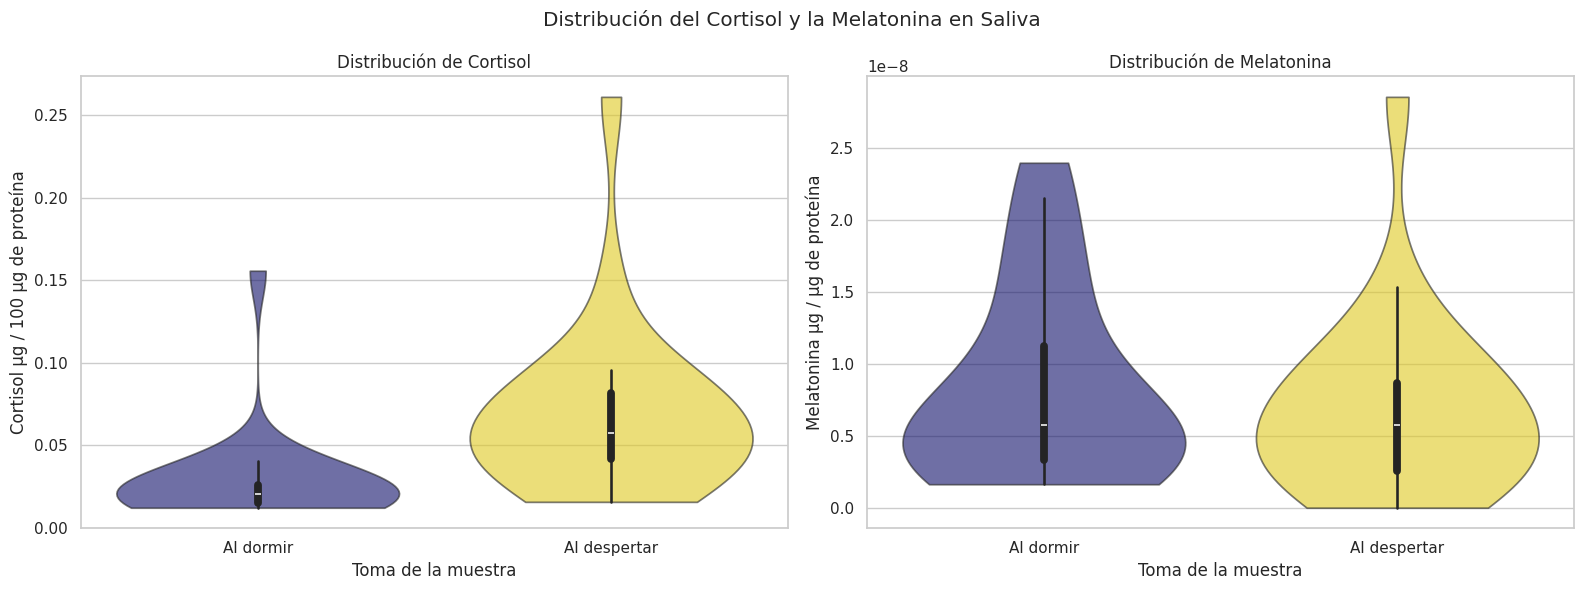

In [26]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución del Cortisol y la Melatonina en Saliva')

sns.violinplot(ax=axs[0], data=df_cortisol, x='Instant', y='Cortisol', hue='Instant', palette=['#000078', '#FFE000'], alpha=0.6, inner='box', cut=0)
axs[0].set_title('Distribución de Cortisol')
axs[0].set_xlabel('Toma de la muestra')
axs[0].set_ylabel('Cortisol μg / 100 μg de proteína')
axs[0].set_xticks(ticks=[0, 1])
axs[0].set_xticklabels(['Al dormir', 'Al despertar'])

sns.violinplot(ax=axs[1], data=df_melatonina, x='Instant', y='Melatonin', hue='Instant', palette=['#000078', '#FFE000'], alpha=0.6, inner='box', cut=0)
axs[1].set_title('Distribución de Melatonina')
axs[1].set_xlabel('Toma de la muestra')
axs[1].set_ylabel('Melatonina μg / μg de proteína')
axs[1].set_xticks(ticks=[0, 1])
axs[1].set_xticklabels(['Al dormir', 'Al despertar'])

plt.tight_layout()
plt.show()

Se analiza el patrón de evolución de melatonina al dormir para cada sujeto en términos absolutos y relativos.

<Figure size 800x1200 with 0 Axes>

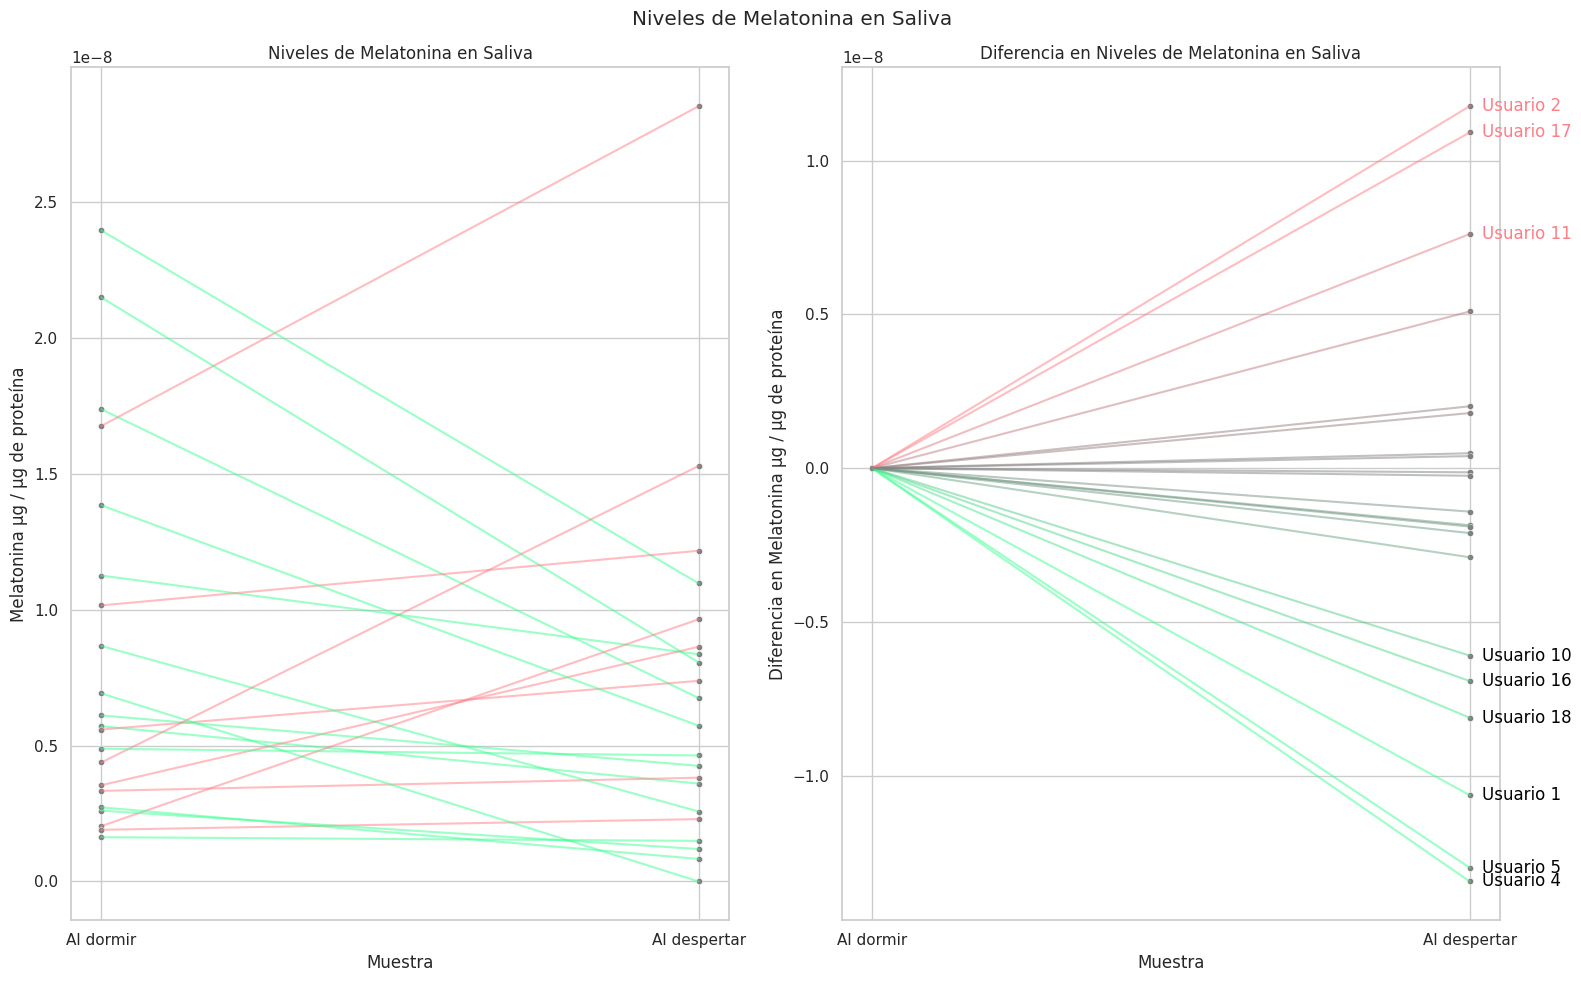

In [33]:
# Crear un gráfico de dispersión conectado con los niveles de melatonina de cada usuario antes de dormir y al despertar
plt.figure(figsize=(8, 12))

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Niveles de Melatonina en Saliva')

# Dibujar los puntos de antes de dormir y al despertar en el primer eje
sns.scatterplot(ax=axs[0], x=[0]*len(df_saliva), y=df_saliva['Melatonin_before_sleep'], color='gray', s=20, legend=False)
sns.scatterplot(ax=axs[0], x=[1]*len(df_saliva), y=df_saliva['Melatonin_wake_up'], color='gray', s=20, legend=False)

# Conectar los puntos con colores específicos en el primer eje
for i in range(len(df_saliva)):
    if df_saliva['Melatonin_wake_up'].iloc[i] > df_saliva['Melatonin_before_sleep'].iloc[i]:
        color = '#FF7D87'
    elif df_saliva['Melatonin_wake_up'].iloc[i] < df_saliva['Melatonin_before_sleep'].iloc[i]:
        color = '#38FF90'
    else:
        color = 'gray'
    axs[0].plot([0, 1], [df_saliva['Melatonin_before_sleep'].iloc[i], df_saliva['Melatonin_wake_up'].iloc[i]], color=color, alpha=0.5)

axs[0].set_title('Niveles de Melatonina en Saliva')
axs[0].set_xlabel('Muestra')
axs[0].set_ylabel('Melatonina μg / μg de proteína')
axs[0].set_xticks(ticks=[0, 1])
axs[0].set_xticklabels(['Al dormir', 'Al despertar'])

# Dibujar los puntos de antes de dormir y al despertar usando la diferencia en lugar de los valores absolutos en el segundo eje
# Crear un df con los datos de melatonina de antes de dormir y al despertar
df_temp_norm = pd.DataFrame({
    'User': df_saliva['User'],
    'Melatonin_before_sleep': df_saliva['Melatonin_before_sleep'],
    'Melatonin_wake_up': df_saliva['Melatonin_wake_up']
})

# Normalizar los valores de melatonina
df_temp_norm['Melatonin_wake_up_norm'] = df_temp_norm['Melatonin_wake_up'] - df_temp_norm['Melatonin_before_sleep']
df_temp_norm['Melatonin_before_sleep'] = 0

# Dibujar los puntos de antes de dormir y al despertar en el segundo eje
sns.scatterplot(ax=axs[1], x=[0]*len(df_temp_norm), y=df_temp_norm['Melatonin_before_sleep'], color='gray', s=20, legend=False)
sns.scatterplot(ax=axs[1], x=[1]*len(df_temp_norm), y=df_temp_norm['Melatonin_wake_up_norm'], color='gray', s=20, legend=False)

# Definir los colores personalizados invertidos
colors = ['#38FF90', 'gray', '#FF7D87']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
norm = TwoSlopeNorm(vmin=-1e-8, vcenter=0, vmax=1e-8)

# Conectar los puntos con colores específicos
for i in range(len(df_temp_norm)):
    color = cmap(norm(df_temp_norm['Melatonin_wake_up_norm'].iloc[i]))
    plt.plot([0, 1], [df_temp_norm['Melatonin_before_sleep'].iloc[i], df_temp_norm['Melatonin_wake_up_norm'].iloc[i]], color=color, alpha=0.5)

# Añadir un texto a los usuarios con variaciones negativas para identificarlos a la derecha de los puntos de al despertar
for i in range(len(df_temp_norm)):
    user_pretty = pretty_user_text(df_temp_norm['User'].iloc[i])
    y_value = df_temp_norm['Melatonin_wake_up_norm'].iloc[i]
    # Si la variación tiene una diferencia mayor a 0.5e-8, se añade un texto a la derecha de los puntos de al despertar
    if df_temp_norm['Melatonin_wake_up_norm'].iloc[i] > 0.6e-8:
        plt.text(1.02, y_value, user_pretty, ha='left', va='center', color='#FF7D87')
    # Si la variación tiene una diferencia menor a -0.5e-8, se añade un texto a la derecha de los puntos de al despertar
    if df_temp_norm['Melatonin_wake_up_norm'].iloc[i] < -0.6e-8:
        plt.text(1.02, y_value, user_pretty, ha='left', va='center', color='black')

axs[1].set_title('Diferencia en Niveles de Melatonina en Saliva')
axs[1].set_xlabel('Muestra')
axs[1].set_ylabel('Diferencia en Melatonina μg / μg de proteína')
axs[1].set_xticks(ticks=[0, 1])
axs[1].set_xticklabels(['Al dormir', 'Al despertar'])

plt.tight_layout()
plt.show()


Se analiza el patrón de evolución de cortisol al dormir para cada sujeto en términos absolutos y relativos.

<Figure size 800x1200 with 0 Axes>

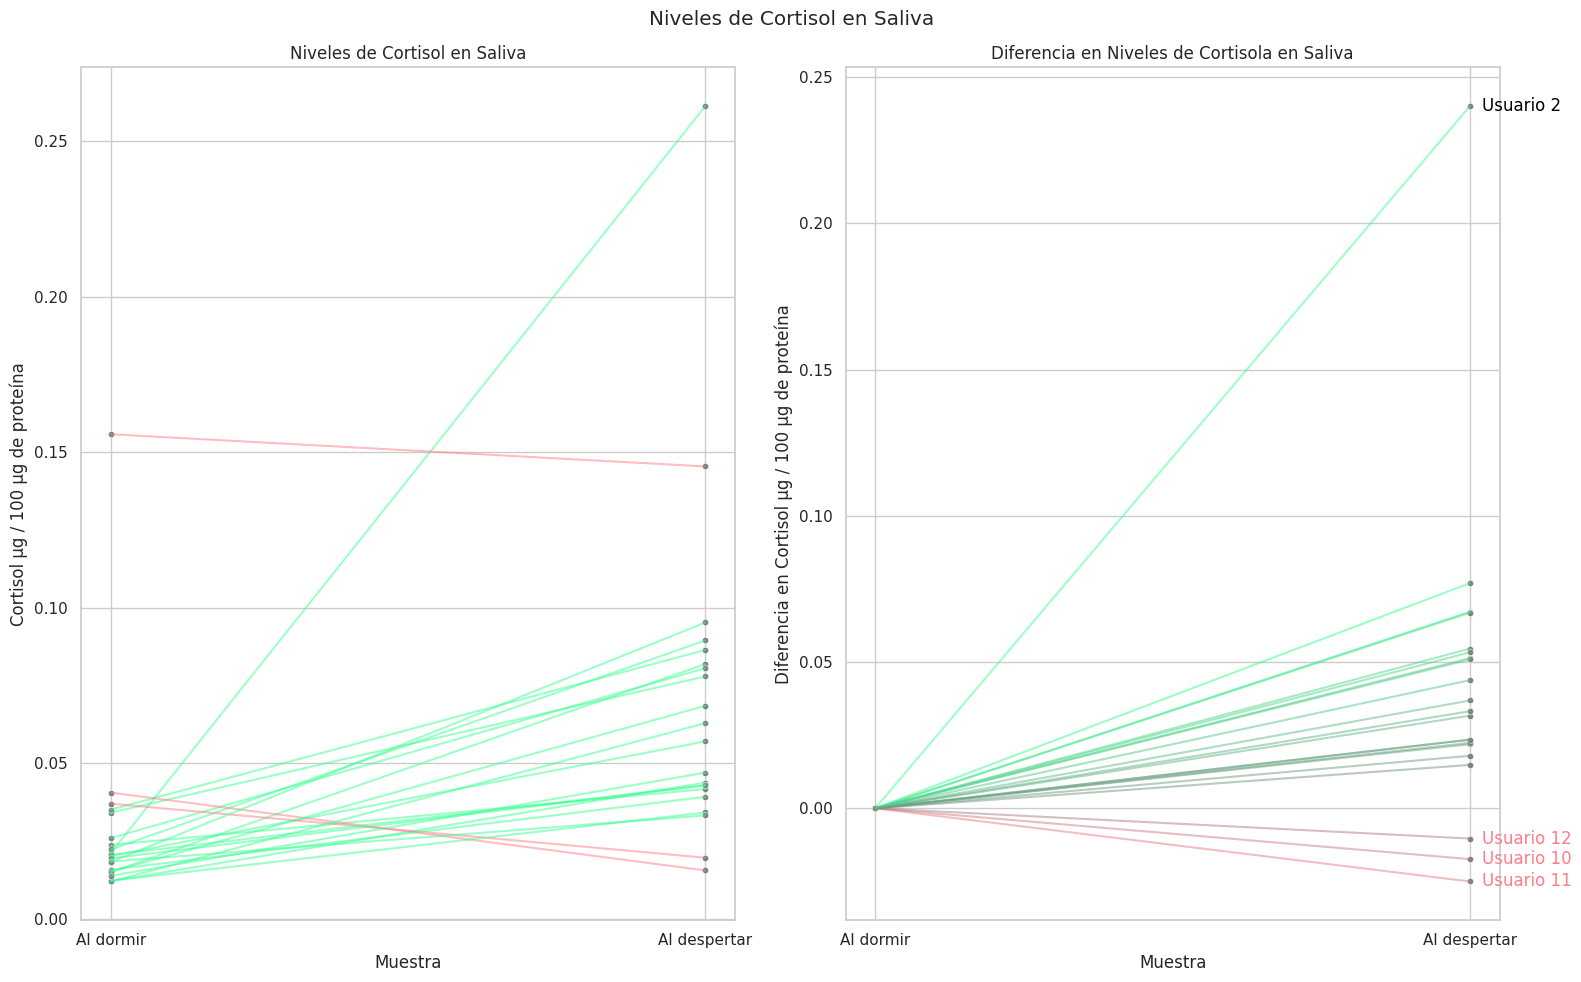

In [48]:
# Crear un gráfico de dispersión conectado con los niveles de cortisol de cada usuario antes de dormir y al despertar
plt.figure(figsize=(8, 12))

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Niveles de Cortisol en Saliva')

# Dibujar los puntos de antes de dormir y al despertar en el primer eje
sns.scatterplot(ax=axs[0], x=[0]*len(df_saliva), y=df_saliva['Cortisol_before_sleep'], color='gray', s=20, legend=False)
sns.scatterplot(ax=axs[0], x=[1]*len(df_saliva), y=df_saliva['Cortisol_wake_up'], color='gray', s=20, legend=False)

# Conectar los puntos con colores específicos en el primer eje
for i in range(len(df_saliva)):
    if df_saliva['Cortisol_wake_up'].iloc[i] > df_saliva['Cortisol_before_sleep'].iloc[i]:
        color = '#38FF90'
    elif df_saliva['Cortisol_wake_up'].iloc[i] < df_saliva['Cortisol_before_sleep'].iloc[i]:
        color = '#FF7D87'
    else:
        color = 'gray'
    axs[0].plot([0, 1], [df_saliva['Cortisol_before_sleep'].iloc[i], df_saliva['Cortisol_wake_up'].iloc[i]], color=color, alpha=0.5)

axs[0].set_title('Niveles de Cortisol en Saliva')
axs[0].set_xlabel('Muestra')
axs[0].set_ylabel('Cortisol μg / 100 μg de proteína')
axs[0].set_xticks(ticks=[0, 1])
axs[0].set_xticklabels(['Al dormir', 'Al despertar'])

# Dibujar los puntos de antes de dormir y al despertar usando la diferencia en lugar de los valores absolutos en el segundo eje
# Crear un df con los datos de Cortisol de antes de dormir y al despertar
df_temp_norm = pd.DataFrame({
    'User': df_saliva['User'],
    'Cortisol_before_sleep': df_saliva['Cortisol_before_sleep'],
    'Cortisol_wake_up': df_saliva['Cortisol_wake_up']
})

# Normalizar los valores de Cortisol
df_temp_norm['Cortisol_wake_up_norm'] = df_temp_norm['Cortisol_wake_up'] - df_temp_norm['Cortisol_before_sleep']
df_temp_norm['Cortisol_before_sleep'] = 0

# Dibujar los puntos de antes de dormir y al despertar en el segundo eje
sns.scatterplot(ax=axs[1], x=[0]*len(df_temp_norm), y=df_temp_norm['Cortisol_before_sleep'], color='gray', s=20, legend=False)
sns.scatterplot(ax=axs[1], x=[1]*len(df_temp_norm), y=df_temp_norm['Cortisol_wake_up_norm'], color='gray', s=20, legend=False)

# Definir los colores personalizados invertidos
colors = ['#FF7D87', 'gray', '#38FF90']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
norm = TwoSlopeNorm(vmin=-0.03, vcenter=0, vmax=0.08)

# Conectar los puntos con colores específicos
for i in range(len(df_temp_norm)):
    color = cmap(norm(df_temp_norm['Cortisol_wake_up_norm'].iloc[i]))
    plt.plot([0, 1], [df_temp_norm['Cortisol_before_sleep'].iloc[i], df_temp_norm['Cortisol_wake_up_norm'].iloc[i]], color=color, alpha=0.5)

# Añadir un texto a los usuarios con variaciones negativas para identificarlos a la derecha de los puntos de al despertar
for i in range(len(df_temp_norm)):
    user_pretty = pretty_user_text(df_temp_norm['User'].iloc[i])
    y_value = df_temp_norm['Cortisol_wake_up_norm'].iloc[i]
    # Si la variación tiene una diferencia mayor a 0.1, se añade un texto a la derecha de los puntos de al despertar
    if df_temp_norm['Cortisol_wake_up_norm'].iloc[i] > 0.1:
        plt.text(1.02, y_value, user_pretty, ha='left', va='center', color='black')
    # Si la variación tiene una diferencia menor a -0, se añade un texto a la derecha de los puntos de al despertar
    if df_temp_norm['Cortisol_wake_up_norm'].iloc[i] < 0:
        plt.text(1.02, y_value, user_pretty, ha='left', va='center', color='#FF7D87')

axs[1].set_title('Diferencia en Niveles de Cortisola en Saliva')
axs[1].set_xlabel('Muestra')
axs[1].set_ylabel('Diferencia en Cortisol μg / 100 μg de proteína')
axs[1].set_xticks(ticks=[0, 1])
axs[1].set_xticklabels(['Al dormir', 'Al despertar'])

plt.tight_layout()
plt.show()